In [54]:
import os
import re
import os
import tqdm
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import graphviz

from collections import defaultdict
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [55]:
#helloooo
#wordd
print("hello world")

hello world


In [56]:
# data_path = "data/html/*.html"

# code2convos = dict()

# pbar = tqdm.tqdm(sorted(list(glob(data_path))))
# for path in pbar:
#     # print(Path.cwd() / path)
#     file_code = os.path.basename(path).split(".")[0]
#     with open(path, "r", encoding="latin1") as fh:
            
#         # get the file id to use it as key later on
#         fid = os.path.basename(path).split(".")[0]

#         # read the html file
#         html_page = fh.read()

#         # parse the html file with bs4 so we can extract needed stuff
#         soup = BeautifulSoup(html_page, "html.parser")

#         # grab the conversations with the data-testid pattern
#         data_test_id_pattern = re.compile(r"conversation-turn-[0-9]+")
#         conversations = soup.find_all("div", attrs={"data-testid": data_test_id_pattern})

#         convo_texts = []

#         for i, convo in enumerate(conversations):
#             convo = convo.find_all("div", attrs={"data-message-author-role":re.compile( r"[user|assistant]") })
#             if len(convo) > 0:
#                 role = convo[0].get("data-message-author-role")
#                 convo_texts.append({
#                         "role" : role,
#                         "text" : convo[0].text
#                     }
#                 )
                
#         code2convos[file_code] = convo_texts

In [57]:
#improved version added error control and other stuff 

"""Use pathlib for file paths: Use pathlib for manipulating file paths instead of manually joining paths using /. This provides better cross-platform compatibility.

Remove unnecessary code: Remove redundant code, such as obtaining the file ID twice.

Use list comprehension for conversations: Use list comprehension to simplify the creation of convo_texts.

Encapsulate code into functions: Organize the code into functions for better readability and reusability.

Error handling: Add error handling, such as checking if the file exists before attempting to open it. 
"""
def extract_conversations_from_html(path):
    with open(path, "r", encoding="latin1") as fh:
        html_page = fh.read()

    soup = BeautifulSoup(html_page, "html.parser")
    data_test_id_pattern = re.compile(r"conversation-turn-[0-9]+")
    conversations = soup.find_all("div", attrs={"data-testid": data_test_id_pattern})

    convo_texts = [
        {
            "role": convo.find("div", attrs={"data-message-author-role": re.compile(r"[user|assistant]")}).get("data-message-author-role"),
            "text": convo.text,
        }
        for convo in conversations
        if convo.find("div", attrs={"data-message-author-role": re.compile(r"[user|assistant]")})
    ]

    return convo_texts

def process_html_file(path):
    file_code = Path(path).stem
    convo_texts = extract_conversations_from_html(path)
    return file_code, convo_texts

data_path = "dataset/*.html"
code2convos = dict()

pbar = tqdm.tqdm(sorted(glob(data_path)))

for path in pbar:
    if not os.path.exists(path):
        print(f"File not found: {path}")
        continue

    file_code, convo_texts = process_html_file(path)
    code2convos[file_code] = convo_texts

100%|██████████| 127/127 [00:14<00:00,  8.76it/s]


In [58]:
#new pipeline 

# def load_html(path):
#     with open(path, "r", encoding="latin1") as fh:
#         return fh.read()

# def parse_html(html_page):
#     return BeautifulSoup(html_page, "html.parser")

# def extract_conversations(soup):
#     data_test_id_pattern = re.compile(r"conversation-turn-[0-9]+")
#     return soup.find_all("div", attrs={"data-testid": data_test_id_pattern})

# def process_conversations(conversations):
#     convo_texts = []
#     for i, convo in enumerate(conversations):
#         convo = convo.find_all("div", attrs={"data-message-author-role":re.compile( r"[user|assistant]") })
#         if len(convo) > 0:
#             role = convo[0].get("data-message-author-role")
#             convo_texts.append({
#                     "role" : role,
#                     "text" : convo[0].text
#                 }
#             )
#     return convo_texts

# def pipeline(path):
#     html_page = load_html(path)
#     soup = parse_html(html_page)
#     conversations = extract_conversations(soup)
#     return process_conversations(conversations)

# # usage
# data_path = "data/html/*.html"
# code2convos = dict()

# pbar = tqdm.tqdm(sorted(list(glob(data_path))))
# for path in pbar:
#     file_code = os.path.basename(path).split(".")[0]
#     code2convos[file_code] = pipeline(path)

In [59]:
# let's see one of the conversations
pprint(code2convos["0031c86e-81f4-4eef-9e0e-28037abf9883"])

[{'role': 'user',
  'text': 'AnonymousLoad a CSV file into a Pandas in Python. The file is named '
          "'cs412_hw1_dataset.csv' and contains columns like 'Species', "
          "'Island', 'Sex', 'Diet', 'Year', 'Life Stage', 'Body Mass (g)', "
          "'Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)', and "
          "'Health Metrics'. \n"},
 {'role': 'assistant',
  'text': 'ChatGPTChatGPTYou can load a CSV file into a Pandas DataFrame in '
          "Python using the pandas.read_csv() function. Here's how you can do "
          'it for your specific CSV file:pythonCopy codeimport pandas as pd\n'
          '\n'
          '# Specify the file path\n'
          "file_path = 'cs412_hw1_dataset.csv'\n"
          '\n'
          '# Load the CSV file into a Pandas DataFrame\n'
          'df = pd.read_csv(file_path)\n'
          '\n'
          '# Display the first few rows of the DataFrame to verify the data '
          'has been loaded\n'
          'print(df.head())\n'
    

#### Things to do:
- Prompt matching with questions
- Feature Engineering
- Question Grades preparation
- Train/Test split
- Fitting a model for predicting the scores

#### Prompt Matching
> We want to match the prompts with the questions in the Homework Let's
> do it with a simple term frequency vectorizing method. For each prompt,
> we will come with a vector that represents it. We will do the same
> thing with each of the homework questions. Then, we will calculate the
> vectors distanance to do the matching

In [60]:
# prompts = []
# code2prompts = defaultdict(list)
# for code , convos in code2convos.items():
#     user_prompts = []
#     for conv in convos:
#         if conv["role"] == "user":
#             prompts.append(conv["text"])
#             user_prompts.append(conv["text"])
#     code2prompts[code] = user_prompts    

# The commented code was taking user prompts from conversations and storing them in two lists: `prompts` and `user_prompts`. The `user_prompts` list was then associated with the corresponding `code` in the `code2prompts` dictionary. However, this code was not performing any text preprocessing.

# The updated code includes a preprocessing step for the user prompts. Here's what it does:

# 1. It downloads the necessary resources for text preprocessing from NLTK: the Punkt tokenizer and the list of English stop words.

# 2. It adds the word 'Anonymous' to the list of stop words. This is because 'Anonymous' is a keyword in your prompts that you want to remove.

# 3. It defines a function `preprocess_text` that takes a sentence as input and performs the following steps:
#    - Replaces 'Anonymous' with 'Anonymous ' (adds a space after 'Anonymous') to treat it as a separate word.
#    - Tokenizes the sentence into individual words.
#    - Removes stop words from the list of words.
#    - Removes punctuation from each word and converts each word to lower case.
#    - Joins the words back into a sentence.

# 4. It applies this `preprocess_text` function to each user prompt in the conversations. The preprocessed prompts are then stored in the `prompts` and `user_prompts` lists, and the `user_prompts` list is associated with the corresponding `code` in the `code2prompts` dictionary.

# So, the main change from the commented code is the addition of the text preprocessing step.

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Add 'anonymous' to the list of stop words
stop_words.add('Anonymous')

# Function to remove stop words and punctuation from a sentence
def preprocess_text(sentence):
    # Add a space after 'Anonymous'
    sentence = sentence.replace('Anonymous', 'Anonymous ')
    # Tokenize the sentence
    word_tokens = word_tokenize(sentence)
    # Remove stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    # Remove punctuation and convert to lower case
    filtered_sentence = [''.join(c for c in w if c not in string.punctuation) for w in filtered_sentence]
    filtered_sentence = [w.lower() for w in filtered_sentence if w]
    return ' '.join(filtered_sentence)

prompts = []
code2prompts = defaultdict(list)
for code , convos in code2convos.items():
    user_prompts = []
    for conv in convos:
        if conv["role"] == "user":
            processed_text = preprocess_text(conv["text"])
            prompts.append(processed_text)
            user_prompts.append(processed_text)
    code2prompts[code] = user_prompts

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\90533\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\90533\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
prompts

['load csv file pandas python the file named cs412hw1datasetcsv contains columns like species island sex diet year life stage body mass g bill length mm bill depth mm flipper length mm health metrics',
 'provide python code understand dataset using pandas find shape dataset display variable names display summary dataset info function show first 5 rows using head function',
 'you preprocess data 1 check missing values handle either dropping filling common values ensure enough data training model you use 80 data training 20 testing 2 encode labels mappings using map function mapping names sexmap female 1 male 0 islandmap biscoe 1 dream 2 torgensen 3 dietmap fish 1 krill 2 squid 3 parental 4 lifestagemap chick 1 juvenile 2 adult 3 healthmetricsmap healthy 1 overweight 2 underweight 3 the dataset named df',
 'you already provide code please recreate part shuffling needed 1 shuffle dataframe named df 2 separate dataset feature matrix x target vector the column healthmetrics columns included

In [62]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Tokenization
tokenized_text = [word_tokenize(sentence) for sentence in prompts]

# Stemming
stemmer = PorterStemmer()
stemmed_text = [[stemmer.stem(word) for word in sentence] for sentence in tokenized_text]

# Joining the text back
prompts = []
prompts = [' '.join(sentence) for sentence in stemmed_text]


In [63]:
prompts

['load csv file panda python the file name cs412hw1datasetcsv contain column like speci island sex diet year life stage bodi mass g bill length mm bill depth mm flipper length mm health metric',
 'provid python code understand dataset use panda find shape dataset display variabl name display summari dataset info function show first 5 row use head function',
 'you preprocess data 1 check miss valu handl either drop fill common valu ensur enough data train model you use 80 data train 20 test 2 encod label map use map function map name sexmap femal 1 male 0 islandmap bisco 1 dream 2 torgensen 3 dietmap fish 1 krill 2 squid 3 parent 4 lifestagemap chick 1 juvenil 2 adult 3 healthmetricsmap healthi 1 overweight 2 underweight 3 the dataset name df',
 'you alreadi provid code pleas recreat part shuffl need 1 shuffl datafram name df 2 separ dataset featur matrix x target vector the column healthmetr column includ x 3 split data train test set 80 data train 20 test ensur split random',
 'calcul

In [64]:
questions = [
    """Initialize
*   First make a copy of the notebook given to you as a starter.
*   Make sure you choose Connect form upper right.
*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.

""",
#####################
    """Load training dataset
    *  Read the .csv file with the pandas library
""",
#####################
"""Understanding the dataset & Preprocessing
Understanding the Dataset:
> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)
> - Display variable names (both dependent and independent).
> - Display the summary of the dataset. (Hint: You can use the **info** function)
> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)
Preprocessing:

> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**

> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)
""",
"""Set X & y, split data

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.
""",
#####################
"""Features and Correlations

* Correlations of features with health
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.
""",
#####################
"""Tune Hyperparameters
* Choose 2 hyperparameters to tune. You can use the Scikit learn decision tree documentation for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values.
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)
""",
#####################
"""Re-train and plot the decision tree with the hyperparameters you have chosen 
- Re-train model with the hyperparameters you have chosen in part 5).
- Plot the tree you have trained. 
Hint: You can import the **plot_tree** function from the sklearn library.
""",
#####################
"""Test your classifier on the test set
- Predict the labels of testing data using the tree you have trained in step 6. 
- Report the classification accuracy.
- Plot & investigate the confusion matrix. Fill the following blanks. 
> The model most frequently mistakes class(es) for class(es).
Hint: You can use the confusion_matrix function from sklearn.metrics
"""]


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize the text
    word_tokens = word_tokenize(text)
    # Remove stop words and punctuation, and convert to lower case
    filtered_text = [w.lower() for w in word_tokens if not w in stop_words and not w in string.punctuation]
    return ' '.join(filtered_text)

# Apply the preprocessing to each question
questions = [preprocess_text(q) for q in questions]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\90533\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\90533\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Tokenization
tokenized_text = [word_tokenize(question) for question in questions]

# Stemming
stemmer = PorterStemmer()
stemmed_text = [[stemmer.stem(word) for word in question] for question in tokenized_text]

# Joining the text back
questions = []
questions = [' '.join(question) for question in stemmed_text]

questions


['initi first make copi notebook given starter make sure choos connect form upper right you may upload data section left colab right click .csv file get path file click `` copi path `` you use load data',
 'load train dataset read .csv file panda librari',
 'understand dataset preprocess understand dataset find shape dataset number sampl number attribut hint you use shape function display variabl name depend independ display summari dataset hint you use info function display first 5 row train dataset hint you use head function preprocess check miss valu dataset if either drop valu fill common valu correspond row be care enough data train model encod categor label map given cell hint you use map function',
 'set x split data shuffl dataset seper depend variabl x independ variabl the column health_metr rest x split train test set 80 20 respect',
 "featur correl correl featur health calcul correl featur dataset highlight strong correl target variabl plot result heatmap featur select selec

In [66]:
# import nltk
# from nltk.corpus import wordnet
# from nltk.tokenize import word_tokenize

# nltk.download('punkt')
# nltk.download('wordnet')

# # Tokenize and lowercase the text in the questions and prompts
# tokenized_questions = [word_tokenize(str(question).lower()) for question in questions]
# tokenized_prompts = [word_tokenize(str(prompt).lower()) for prompt in prompts]

# # Flatten the lists of tokens
# words_in_questions = [word for tokens in tokenized_questions for word in tokens]
# words_in_prompts = [word for tokens in tokenized_prompts for word in tokens]

# # Find synonyms of words in questions
# synonyms = {}
# for word in words_in_questions:
#     for syn in wordnet.synsets(word):
#         for lemma in syn.lemmas():
#             synonyms[lemma.name()] = word

# # Check if words in prompts are synonyms of words in questions
# for word in words_in_prompts:
#     if word in synonyms:
#         print(f"The word '{word}' in prompts is a synonym of the word '{synonyms[word]}' in questions.")

In [67]:
# synonyms

In [68]:
questions
prompts


['load csv file panda python the file name cs412hw1datasetcsv contain column like speci island sex diet year life stage bodi mass g bill length mm bill depth mm flipper length mm health metric',
 'provid python code understand dataset use panda find shape dataset display variabl name display summari dataset info function show first 5 row use head function',
 'you preprocess data 1 check miss valu handl either drop fill common valu ensur enough data train model you use 80 data train 20 test 2 encod label map use map function map name sexmap femal 1 male 0 islandmap bisco 1 dream 2 torgensen 3 dietmap fish 1 krill 2 squid 3 parent 4 lifestagemap chick 1 juvenil 2 adult 3 healthmetricsmap healthi 1 overweight 2 underweight 3 the dataset name df',
 'you alreadi provid code pleas recreat part shuffl need 1 shuffl datafram name df 2 separ dataset featur matrix x target vector the column healthmetr column includ x 3 split data train test set 80 data train 20 test ensur split random',
 'calcul

In [69]:
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(prompts + questions)

In [70]:
# questions_TF_IDF = pd.DataFrame(vectorizer.transform(questions).toarray(), columns=vectorizer.get_feature_names_out())
# questions_TF_IDF.head()
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Set the option to display all columns

# Fit the vectorizer on your questions data and transform the data
questions_TF_IDF = pd.DataFrame(vectorizer.fit_transform(questions).toarray(), columns=vectorizer.get_feature_names_out())

# Set the option to display all columns
#eğer hepsini göstermek istemezsek None yerine 5 yazabiliriz
pd.set_option('display.max_columns', None)


# Display the first 5 rows
questions_TF_IDF

20        80        __    __note  accuraci  attribut     avail  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.096331  0.000000   
3  0.219106  0.219106  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.085001  0.085001  0.061472  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.076506  0.000000  0.105789   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.118687  0.000000  0.000000   

       base        be      best     blank    calcul      care   categor  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.096331  0.000000  0.000000  0.000000  0.096331  0.096331   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.085001  0.000000  0.000000  0.000000  0.085001  0.000000  0.000000   
5  0.000000  0.000000  0.105789  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.164116  0.000000  0.000000  0.000000   

       cell     check     choic     choos     chose    chosen     class  \
0  0.000000  0.000000  0.000000  0.129268  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.096331  0.096331  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.085001  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.177320  0.211579  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.402963  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.328232   

    classif  classifi     click     colab    column    common    comput  \
0  0.000000  0.000000  0.308486  0.154243  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.096331  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.219106  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.085001   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.164116  0.164116  0.000000  0.000000  0.000000  0.000000  0.000000   

     confus  confusion_matrix   connect      copi    correl  correspond  \
0  0.000000          0.000000  0.154243  0.308486  0.000000    0.000000   
1  0.000000          0.000000  0.000000  0.000000  0.000000    0.000000   
2  0.000000          0.000000  0.000000  0.000000  0.000000    0.096331   
3  0.000000          0.000000  0.000000  0.000000  0.000000    0.000000   
4  0.000000          0.000000  0.000000  0.000000  0.510004    0.000000   
5  0.000000          0.000000  0.000000  0.000000  0.000000    0.000000   
6  0.000000          0.000000  0.000000  0.000000  0.000000    0.000000   
7  0.164116          0.164116  0.000000  0.000000  0.000000    0.000000   

      could     cross       csv      data   dataset     decis    depend  \
0  0.000000  0.000000  0.129268  0.195605  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.356497  0.000000  0.269722  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.061082  0.366491  0.000000  0.080733   
3  0.000000  0.000000  0.000000  0.138931  0.138931  0.000000  0.183628   
4  0.085001  0.000000  0.000000  0.000000  0.053897  0.000000  0.000000   
5  0.000000  0.105789  0.000000  0.000000  0.000000  0.088660  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.168857  0.000000   
7  0.000000  0.000000  0.0000

In [71]:
len(code2prompts["0031c86e-81f4-4eef-9e0e-28037abf9883"])

14

In [72]:
code2prompts_tf_idf = dict()

for code, user_prompts in code2prompts.items():
    if len(user_prompts) == 0:
        # some files have issues
        print(code+".html")
        continue
    prompts_TF_IDF = pd.DataFrame(vectorizer.transform(user_prompts).toarray(), columns=vectorizer.get_feature_names_out())
    code2prompts_tf_idf[code] = prompts_TF_IDF

139235c7-736c-4237-92f0-92e8c116832c.html
668ad17e-0240-49f7-b5a7-d22e502554c6.html
b0640e51-6879-40cb-a4f5-329f952ef99d.html
da6b70d5-29f6-491a-ad46-037c77067128.html


In [73]:
code2prompts_tf_idf["089eb66d-4c3a-4f58-b98f-a3774a2efb34"].head()

20   80   __  __note  accuraci  attribut  avail  base       be  best  \
0  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   
1  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   
2  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   
3  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.33504   0.0   
4  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   

   blank  calcul  care  categor  cell    check  choic  choos  chose  chosen  \
0    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   
1    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   
2    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   
3    0.0     0.0   0.0      0.0   0.0  0.33504    0.0    0.0    0.0     0.0   
4    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   

   class  classif  classifi  click  colab  column    common  comput  confus  \
0    0.0      0.0       0.0    0.0    0.0     0.0  0.000000     0.0     0.0   
1    0.0      0.0       0.0    0.0    0.0     0.0  0.000000     0.0     0.0   
2    0.0      0.0       0.0    0.0    0.0     0.0  0.000000     0.0     0.0   
3    0.0      0.0       0.0    0.0    0.0     0.0  0.335040     0.0     0.0   
4    0.0      0.0       0.0    0.0    0.0     0.0  0.844534     0.0     0.0   

   confusion_matrix  connect  copi  correl  correspond  could  cross  \
0               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
1               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
2               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
3               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
4               0.0      0.0   0.0     0.0         0.0    0.0    0.0   

        csv      data   dataset  decis  depend  deriv   display  document  \
0  0.000000  0.000000  0.000000    0.0     0.0    0.0  0.000000       0.0   
1  0.570934  0.000000  0.000000    0.0     0.0    0.0  0.000000       0.0   
2  0.000000  0.000000  0.291445    0.0     0.0    0.0  0.459633       0.0   
3  0.000000  0.212442  0.212442    0.0     0.0    0.0  0.000000       0.0   
4  0.000000  0.535502  0.000000    0.0     0.0    0.0  0.000000       0.0   

   driver     drop   either  encod  enhanc   enough   es  expect  explain  \
0     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   
1     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   
2     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   
3     0.0  0.33504  0.33504    0.0     0.0  0.33504  0.0     0.0      0.0   
4     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   

   featur      file     fill      find     first  follow  form  frequent  \
0     0.0  0.000000  0.00000  0.000000  0.000000     0.0   0.0       0.0   
1     0.0  0.570934  0.00000  0.000000  0.000000     0.0   0.0       0.0   
2     0.0  0.000000  0.00000  0.306422  0.128403     0.0   0.0       0.0   
3     0.0  0.000000  0.28079  0.000000  0.000000     0.0   0.0       0.0   
4     0.0  0.000000  0.00000  0.000000  0.000000     0.0   0.0       0.0   

   function  get  given  gpt  gridsearchcv      head  health  health_metr  \
0  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   
1  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   
2  0.332403  0.0    0.0  0.0           0.0  0.153211     0.0          0.0   
3  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   
4  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   

   heatmap  help  highlight      hint  hyper  hyperparamet  hypothet       if  \
0      0.0   0.0        0.0  0.000000    0.0           0.0       0.0  0.00000   
1      0.0   0.0        0.0  0.000000    0.0           0.0       0.0  0.00000   
2      0.0   0.0        0.0  0.332403    0.0           0.0       0.0  0.000

In [74]:
code2prompts_tf_idf["089eb66d-4c3a-4f58-b98f-a3774a2efb34"].head()

20   80   __  __note  accuraci  attribut  avail  base       be  best  \
0  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   
1  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   
2  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   
3  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.33504   0.0   
4  0.0  0.0  0.0     0.0       0.0       0.0    0.0   0.0  0.00000   0.0   

   blank  calcul  care  categor  cell    check  choic  choos  chose  chosen  \
0    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   
1    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   
2    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   
3    0.0     0.0   0.0      0.0   0.0  0.33504    0.0    0.0    0.0     0.0   
4    0.0     0.0   0.0      0.0   0.0  0.00000    0.0    0.0    0.0     0.0   

   class  classif  classifi  click  colab  column    common  comput  confus  \
0    0.0      0.0       0.0    0.0    0.0     0.0  0.000000     0.0     0.0   
1    0.0      0.0       0.0    0.0    0.0     0.0  0.000000     0.0     0.0   
2    0.0      0.0       0.0    0.0    0.0     0.0  0.000000     0.0     0.0   
3    0.0      0.0       0.0    0.0    0.0     0.0  0.335040     0.0     0.0   
4    0.0      0.0       0.0    0.0    0.0     0.0  0.844534     0.0     0.0   

   confusion_matrix  connect  copi  correl  correspond  could  cross  \
0               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
1               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
2               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
3               0.0      0.0   0.0     0.0         0.0    0.0    0.0   
4               0.0      0.0   0.0     0.0         0.0    0.0    0.0   

        csv      data   dataset  decis  depend  deriv   display  document  \
0  0.000000  0.000000  0.000000    0.0     0.0    0.0  0.000000       0.0   
1  0.570934  0.000000  0.000000    0.0     0.0    0.0  0.000000       0.0   
2  0.000000  0.000000  0.291445    0.0     0.0    0.0  0.459633       0.0   
3  0.000000  0.212442  0.212442    0.0     0.0    0.0  0.000000       0.0   
4  0.000000  0.535502  0.000000    0.0     0.0    0.0  0.000000       0.0   

   driver     drop   either  encod  enhanc   enough   es  expect  explain  \
0     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   
1     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   
2     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   
3     0.0  0.33504  0.33504    0.0     0.0  0.33504  0.0     0.0      0.0   
4     0.0  0.00000  0.00000    0.0     0.0  0.00000  0.0     0.0      0.0   

   featur      file     fill      find     first  follow  form  frequent  \
0     0.0  0.000000  0.00000  0.000000  0.000000     0.0   0.0       0.0   
1     0.0  0.570934  0.00000  0.000000  0.000000     0.0   0.0       0.0   
2     0.0  0.000000  0.00000  0.306422  0.128403     0.0   0.0       0.0   
3     0.0  0.000000  0.28079  0.000000  0.000000     0.0   0.0       0.0   
4     0.0  0.000000  0.00000  0.000000  0.000000     0.0   0.0       0.0   

   function  get  given  gpt  gridsearchcv      head  health  health_metr  \
0  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   
1  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   
2  0.332403  0.0    0.0  0.0           0.0  0.153211     0.0          0.0   
3  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   
4  0.000000  0.0    0.0  0.0           0.0  0.000000     0.0          0.0   

   heatmap  help  highlight      hint  hyper  hyperparamet  hypothet       if  \
0      0.0   0.0        0.0  0.000000    0.0           0.0       0.0  0.00000   
1      0.0   0.0        0.0  0.000000    0.0           0.0       0.0  0.00000   
2      0.0   0.0        0.0  0.332403    0.0           0.0       0.0  0.000

In [75]:
code2cosine = dict()
for code, user_prompts_tf_idf in code2prompts_tf_idf.items():
    code2cosine[code] = pd.DataFrame(cosine_similarity(questions_TF_IDF,user_prompts_tf_idf))

In [76]:
# questions[4]

# prompquestion = (
#     {"question1":["prompt1,prompt2,prompt3"],
#      "question2":["prompt1,prompt2,prompt3"]}
# )

code2cosine



{'0031c86e-81f4-4eef-9e0e-28037abf9883':          0         1         2         3         4         5         6   \
 0  0.247160  0.026741  0.151617  0.099547  0.019509  0.000000  0.080246   
 1  0.454416  0.126645  0.044087  0.052370  0.000000  0.000000  0.080564   
 2  0.000000  0.597386  0.439990  0.124343  0.048737  0.000000  0.214320   
 3  0.058516  0.065233  0.243467  0.510641  0.117342  0.000000  0.144711   
 4  0.064641  0.046288  0.028562  0.069021  0.213922  0.085001  0.136221   
 5  0.000000  0.000000  0.046512  0.008089  0.040142  0.000000  0.060108   
 6  0.000000  0.052021  0.073985  0.077103  0.000000  0.000000  0.000000   
 7  0.043830  0.042374  0.175025  0.244404  0.077779  0.000000  0.062166   
 
          7         8         9         10        11        12        13  
 0  0.056779  0.000000  0.000000  0.029394  0.000000  0.000000  0.016323  
 1  0.044903  0.000000  0.000000  0.000000  0.000000  0.000000  0.045016  
 2  0.101689  0.000000  0.000000  0.018358  0.058

In [77]:
#prompt question cosine benzerliklerinin row toplamını bulmak için kullanılan kod 

row_sums_dict = {}

for key, df in code2cosine.items():
    row_sums_dict[key] = df.sum(axis=1)

# Display the results
for key, row_sums in row_sums_dict.items():
    print(f"Row sums for {key}:\n{row_sums}\n")

Row sums for 0031c86e-81f4-4eef-9e0e-28037abf9883:
0    0.727318
1    0.848001
2    1.772975
3    1.877662
4    1.660059
5    0.589126
6    0.277779
7    0.859775
dtype: float64

Row sums for 0225686d-b825-4cac-8691-3a3a5343df2b:
0    0.907814
1    1.128118
2    2.796898
3    1.410312
4    1.210762
5    1.436795
6    1.400201
7    2.413624
dtype: float64

Row sums for 041f950b-c013-409a-a642-cffff60b9d4b:
0    0.159156
1    0.146382
2    0.687788
3    0.329287
4    0.401787
5    0.179868
6    0.598637
7    0.958546
dtype: float64

Row sums for 04f91058-d0f8-4324-83b2-19c671f433dc:
0    0.385988
1    0.421415
2    1.729494
3    1.630599
4    0.857675
5    0.796032
6    0.673506
7    1.455710
dtype: float64

Row sums for 089eb66d-4c3a-4f58-b98f-a3774a2efb34:
0    3.976815
1    1.227104
2    6.268070
3    5.419198
4    3.276208
5    2.805476
6    3.842585
7    5.256957
dtype: float64

Row sums for 090d6217-5d69-4929-a342-19abab78324f:
0    2.865209
1    2.865172
2    6.993080
3    5.12501

In [78]:
row_sums_dict

{'0031c86e-81f4-4eef-9e0e-28037abf9883': 0    0.727318
 1    0.848001
 2    1.772975
 3    1.877662
 4    1.660059
 5    0.589126
 6    0.277779
 7    0.859775
 dtype: float64,
 '0225686d-b825-4cac-8691-3a3a5343df2b': 0    0.907814
 1    1.128118
 2    2.796898
 3    1.410312
 4    1.210762
 5    1.436795
 6    1.400201
 7    2.413624
 dtype: float64,
 '041f950b-c013-409a-a642-cffff60b9d4b': 0    0.159156
 1    0.146382
 2    0.687788
 3    0.329287
 4    0.401787
 5    0.179868
 6    0.598637
 7    0.958546
 dtype: float64,
 '04f91058-d0f8-4324-83b2-19c671f433dc': 0    0.385988
 1    0.421415
 2    1.729494
 3    1.630599
 4    0.857675
 5    0.796032
 6    0.673506
 7    1.455710
 dtype: float64,
 '089eb66d-4c3a-4f58-b98f-a3774a2efb34': 0    3.976815
 1    1.227104
 2    6.268070
 3    5.419198
 4    3.276208
 5    2.805476
 6    3.842585
 7    5.256957
 dtype: float64,
 '090d6217-5d69-4929-a342-19abab78324f': 0    2.865209
 1    2.865172
 2    6.993080
 3    5.125013
 4    2.210564


In [79]:
# Convert the dictionary values to a DataFrame
df = pd.DataFrame(row_sums_dict)

# Find the maximum value in the first row (index 0)
#yuvarlama uyguladım çünkü row_sums_dict 

max_values = []
for i in range(1, 9):
    max_value = round(df.iloc[i-1].max(), 6)
    max_values.append(max_value)

print("Maximum values for each question:", max_values)

min_values = []
for i in range(1, 9):
    min_value =  round(df.iloc[i-1][df.iloc[i-1] > 0].min(), 6)
    min_values.append(min_value)

print("Minimum values greater than zero for each question:", min_values)





Maximum values for each question: [4.871838, 3.358612, 9.651533, 9.479767, 5.316441, 4.679173, 6.932611, 7.767496]
Minimum values greater than zero for each question: [0.065902, 0.014903, 0.041159, 0.065977, 0.071237, 0.004823, 0.062459, 0.119232]


In [80]:
df  = pd.DataFrame(row_sums_dict)

normalization_dict = {}


for i in range (1,9):
    normalization_dict[i] = (df.iloc[i-1] - min_values[i-1]) / (max_values[i-1] - min_values[i-1])
    
normalization_dict



{1: 0031c86e-81f4-4eef-9e0e-28037abf9883    0.137625
 0225686d-b825-4cac-8691-3a3a5343df2b    0.175182
 041f950b-c013-409a-a642-cffff60b9d4b    0.019404
 04f91058-d0f8-4324-83b2-19c671f433dc    0.066602
 089eb66d-4c3a-4f58-b98f-a3774a2efb34    0.813767
                                           ...   
 f24219d6-07f0-4baf-80ac-18475dc5b66f    0.140995
 f2f18684-4a16-4c05-a2d1-c0f96d1de869    0.356458
 f852596d-fdca-45aa-9050-d4f76ce6a53c    0.237686
 f8ec3336-fd48-4654-ad98-62ccfb96d096    0.184212
 fb8de815-224c-4d06-9fd4-7156d1a9920d    0.317443
 Name: 0, Length: 123, dtype: float64,
 2: 0031c86e-81f4-4eef-9e0e-28037abf9883    0.249154
 0225686d-b825-4cac-8691-3a3a5343df2b    0.332928
 041f950b-c013-409a-a642-cffff60b9d4b    0.039321
 04f91058-d0f8-4324-83b2-19c671f433dc    0.121575
 089eb66d-4c3a-4f58-b98f-a3774a2efb34    0.362532
                                           ...   
 f24219d6-07f0-4baf-80ac-18475dc5b66f    0.273161
 f2f18684-4a16-4c05-a2d1-c0f96d1de869    0.455508
 f852

In [81]:
# Define the total points for each question
total_points = {1: 0, 2: 5, 3: 15, 4: 15, 5: 20, 6: 15, 7: 20, 8: 10}

# Find the maximum correlation coefficient
all_values = [value for series in normalization_dict.values() for value in series]
print(all_values)
max_coeff = max(all_values)

# Calculate the final scores
final_scores = {}
for i in range(1, 9):
    relative_score = normalization_dict[i] / max_coeff
    final_score = relative_score * total_points[i]
    final_scores[i] = final_score

print('max coeff', max_coeff)
print("Final scores for each question:", final_scores)

[0.1376247704011265, 0.17518162316125002, 0.019403970872945618, 0.06660220395770221, 0.8137672361934122, 0.5824686549541185, 0.37718708623672537, 0.053962025555468064, 0.47292265024272817, 0.08782316346653064, 0.4920616085914797, 0.5650305228164318, 0.18518976762651274, 0.06666856795009796, 0.1875441472550916, 0.3322529572433556, 0.12388198601515117, 0.10378514905457145, 0.26851780374025613, 0.017290421300506478, 0.8407997803980984, 0.19517921065896507, 0.20962783091792792, 0.06479964845291536, 0.2178110408215193, 0.14543806873984544, 0.15349495204908736, 0.036863198493358194, 0.5756307029362165, 0.006834007224011864, 0.031074343173642775, 0.16725791043342686, 0.1977643200333305, 0.6620103031109945, 0.16218503481089128, 0.08961902378465061, 0.2816914973074588, 0.15899844650079759, 0.8055421217992231, 0.10900945368858, 0.18923021531462864, 0.5162127827283826, 0.11485643889893939, 0.18527594728931074, 0.4377947394089518, 0.4736073015022846, 0.159814180817609, 0.8135637168377137, 0.527143

In [82]:
code2questionmapping = dict()
for code, cosine_scores in code2cosine.items():
    code2questionmapping[code] = code2cosine[code].max(axis=1).tolist()


question_mapping_scores = pd.DataFrame(code2questionmapping).T
question_mapping_scores.reset_index(inplace=True)
question_mapping_scores.rename(columns={i: f"Q_{i}" for i in range(len(questions))}, inplace=True)
question_mapping_scores.rename(columns={"index" : "code"}, inplace=True)

question_mapping_scores

code       Q_0       Q_1       Q_2  \
0    0031c86e-81f4-4eef-9e0e-28037abf9883  0.247160  0.454416  0.597386   
1    0225686d-b825-4cac-8691-3a3a5343df2b  0.209585  0.659639  0.739568   
2    041f950b-c013-409a-a642-cffff60b9d4b  0.159156  0.146382  0.476740   
3    04f91058-d0f8-4324-83b2-19c671f433dc  0.097802  0.269722  0.366491   
4    089eb66d-4c3a-4f58-b98f-a3774a2efb34  0.431564  0.551965  0.727811   
..                                    ...       ...       ...       ...   
118  f24219d6-07f0-4baf-80ac-18475dc5b66f  0.194212  0.269722  0.407031   
119  f2f18684-4a16-4c05-a2d1-c0f96d1de869  0.132674  0.269722  0.366491   
120  f852596d-fdca-45aa-9050-d4f76ce6a53c  0.259821  0.796846  0.837383   
121  f8ec3336-fd48-4654-ad98-62ccfb96d096  0.231330  0.796846  0.837383   
122  fb8de815-224c-4d06-9fd4-7156d1a9920d  0.204073  0.702957  0.746387   

          Q_3       Q_4       Q_5       Q_6       Q_7  
0    0.510641  0.297158  0.374000  0.077103  0.244404  
1    0.637079  0.267884  0.559101  0.596132  0.552411  
2    0.282473  0.262501  0.179868  0.340461  0.489587  
3    0.488918  0.245376  0.375104  0.170774  0.389027  
4    0.559391  0.276744  0.439470  0.387740  0.685935  
..        ...       ...       ...       ...       ...  
118  0.438211  0.176049  0.369122  0.714741  0.746819  
119  0.655625  0.375208  0.559101  0.288398  0.685935  
120  0.770343  0.402084  0.583926  0.687930  0.803035  
121  0.628084  0.402084  0.542587  0.714741  0.783837  
122  0.637924  0.402084  0.531935  0.693310  0.765952  

[123 rows x 9 columns]

In [83]:
import numpy as np

# Assuming question_mapping_scores is a DataFrame with columns including 'code'
# and numerical columns for correlation coefficients

total_points = {1: 0, 2: 5, 3: 15, 4: 15, 5: 20, 6: 15, 7: 20, 8: 10}

# Get the maximum correlation coefficient for each question
coef_columns = question_mapping_scores.columns[1:]
max_coeffs = question_mapping_scores[coef_columns].max(axis=0)

print("Maximum correlation coefficients for each question:", max_coeffs.values)

# Calculate the final scores
final_scores = {}

for code in question_mapping_scores['code']:
    # Selecting rows where 'code' is equal to the current code
    relative_scores = question_mapping_scores.loc[question_mapping_scores['code'] == code, coef_columns].values[0] / max_coeffs.values
    # Multiply relative scores by corresponding total points
    final_scores[code] = (relative_scores * np.array(list(total_points.values()))).tolist()
    
    print(code, ":", final_scores[code])
    print("-------------------------")
    print("relative scores:", relative_scores)


Maximum correlation coefficients for each question: [0.90277754 0.7968465  0.83738307 0.7703427  0.51000402 0.58392638
 0.7147405  0.80303526]
0031c86e-81f4-4eef-9e0e-28037abf9883 : [0.0, 2.8513391107738384, 10.70094385417394, 9.943125147155087, 11.653180377293406, 9.607370590032948, 2.1575011897021574, 3.0435059395964403]
-------------------------
relative scores: [0.27377751 0.57026782 0.71339626 0.66287501 0.58265902 0.64049137
 0.10787506 0.30435059]
0225686d-b825-4cac-8691-3a3a5343df2b : [0.0, 4.139062250118053, 13.247836139419725, 12.405117922475094, 10.505159413035079, 14.3622713626468, 16.681083391901975, 6.879035010203482]
-------------------------
relative scores: [0.232156   0.82781245 0.88318908 0.82700786 0.52525797 0.95748476
 0.83405417 0.6879035 ]
041f950b-c013-409a-a642-cffff60b9d4b : [0.0, 0.9185055044145735, 8.539824379138352, 5.500279780934558, 10.294095206545729, 4.62048242603823, 9.526851383645113, 6.096703210033986]
-------------------------
relative scores: [0.1

In [84]:
import pandas as pd
total_final_scores = {code: sum(scores) for code, scores in final_scores.items()}

print("Total final scores for each code:", total_final_scores) 

# Create a DataFrame from the total_final_scores dictionary
df_score_calculation = pd.DataFrame.from_dict(total_final_scores, orient='index', columns=['Total Final Score'])

df_score_calculation.rename_axis('code', inplace=True)
df_score_calculation.rename(columns={'Total Final Score': 'score_calculation',"index":"code"}, inplace=True)

# Display the DataFrame
df_score_calculation 


Total final scores for each code: {'0031c86e-81f4-4eef-9e0e-28037abf9883': 49.95696620872783, '0225686d-b825-4cac-8691-3a3a5343df2b': 78.2195654898002, '041f950b-c013-409a-a642-cffff60b9d4b': 45.496741890750535, '04f91058-d0f8-4324-83b2-19c671f433dc': 46.658865810140554, '089eb66d-4c3a-4f58-b98f-a3774a2efb34': 68.92644114608281, '090d6217-5d69-4929-a342-19abab78324f': 69.83408039609739, '0c95c563-f1e1-4a35-844c-2e8ccdd1b161': 81.76234107816744, '0ddfae9c-0dbd-4fbe-9e68-c3e0cb73b8fc': 32.64936301698345, '0e466794-f7f8-4cc2-b07e-070b13a0b5e1': 73.33709345254798, '0f0c953a-a472-47c1-809b-9fc14dba9091': 62.74100207238314, '1029802d-1057-4e3e-b827-e8a9c2ded3b9': 66.64109817957812, '1038cb22-8ad2-4030-b44a-59f10352e91c': 54.266013059444646, '106ffe99-c787-4d09-9076-4ba411eb68b1': 92.69609187235184, '14ce054d-4619-4685-ba9b-4b5cd6f81b2d': 50.254960800466485, '152a7787-ecd1-448f-a98e-8af0826d8215': 77.14932226008298, '17bd62e7-6792-4399-a573-07456a73901b': 84.7685422069227, '1b54e38b-3b1d-425e

score_calculation
code                                                   
0031c86e-81f4-4eef-9e0e-28037abf9883          49.956966
0225686d-b825-4cac-8691-3a3a5343df2b          78.219565
041f950b-c013-409a-a642-cffff60b9d4b          45.496742
04f91058-d0f8-4324-83b2-19c671f433dc          46.658866
089eb66d-4c3a-4f58-b98f-a3774a2efb34          68.926441
...                                                 ...
f24219d6-07f0-4baf-80ac-18475dc5b66f          63.202221
f2f18684-4a16-4c05-a2d1-c0f96d1de869          66.711565
f852596d-fdca-45aa-9050-d4f76ce6a53c          95.017652
f8ec3336-fd48-4654-ad98-62ccfb96d096          91.696830
fb8de815-224c-4d06-9fd4-7156d1a9920d          88.573274

[123 rows x 1 columns]

In [85]:
# questions = [
#     "Initialize...",
#     "Load training dataset...",
#     "Understanding the dataset & Preprocessing...",
#     "Set X & y, split data...",
#     "Features and Correlations...",
#     "Tune Hyperparameters...",
#     "Re-train and plot the decision tree with the hyperparameters you have chosen...",
#     "Test your classifier on the test set...",
#     "Find the information gain on the first split..."
# ]

# grades = [5, 15, 5, 10, 20, 15, 20, 10, 10]

# assert len(questions) == len(grades), "The number of questions must be equal to the number of grades"

# question2grade = {i: grade for i, grade in enumerate(grades)}
# code2questionmapping = dict()
# for code, cosine_scores in code2cosine.items():
#     # Normalize the similarity scores to the range of the grades
#     normalized_scores = np.interp(code2cosine[code].max(axis=1), (code2cosine[code].max(axis=1).min(), code2cosine[code].max(axis=1).max()), (min(grades), max(grades)))
#     code2questionmapping[code] = normalized_scores.tolist()

# question_mapping_scores = pd.DataFrame(code2questionmapping).T
# question_mapping_scores.reset_index(inplace=True)

# # Rename columns
# new_columns = {i: f"Q_{i}" for i in range(len(questions))}
# question_mapping_scores.rename(columns=new_columns, inplace=True)
# question_mapping_scores.rename(columns={"index" : "code"}, inplace=True)

# question_mapping_scores

# Feature Engineering
- Number of prompts that a uers asked
- Number of complaints that a user makes e.g "the code gives this error!"
- User prompts average number of characters

In [86]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Function to preprocess and stem a sentence
def preprocess_and_stem_text(sentence):
    # Preprocess the sentence
    sentence = preprocess_text(sentence)
    # Tokenize the sentence
    word_tokens = word_tokenize(sentence)
    # Stem the words
    stemmer = PorterStemmer()
    stemmed_sentence = [stemmer.stem(word) for word in word_tokens]
    # Join the words back into a sentence
    return ' '.join(stemmed_sentence)

# Apply the preprocessing and stemming to the 'text' field in the 'code2convos' dictionary
for code, convos in code2convos.items():
    for convo in convos:
        # Preprocess and stem the 'text' field
        convo['text'] = preprocess_and_stem_text(convo['text'])

In [87]:
code2convos

{'0031c86e-81f4-4eef-9e0e-28037abf9883': [{'role': 'user',
   'text': "anonymousload csv file panda python the file name 'cs412_hw1_dataset.csv contain column like 'speci 'island 'sex 'diet 'year 'life stage 'bodi mass g 'bill length mm 'bill depth mm 'flipper length mm 'health metric"},
  {'role': 'assistant',
   'text': "chatgptchatgpty load csv file panda datafram python use pandas.read_csv function here 's specif csv file pythoncopi codeimport panda pd specifi file path file_path 'cs412_hw1_dataset.csv ' load csv file panda datafram df pd.read_csv file_path display first row datafram verifi data load print df.head thi code assum csv file 'cs412_hw1_dataset.csv directori python script jupyt notebook if file differ directori specifi full path file file_path variable.th pd.read_csv function automat infer column name first row csv file n't need explicitli specifi column name unless differ provid you access column datafram use name e.g . df 'speci df 'island etc"},
  {'role': 'user',
  

In [88]:
# # code2convos bu şekilde bir output veriyordu o yüzden text kısmı process edildi {'0031c86e-81f4-4eef-9e0e-28037abf9883': [{'role': 'user',
#    'text': "AnonymousLoad a CSV file into a Pandas in Python. The file is named 'cs412_hw1_dataset.csv' and contains columns like 'Species', 'Island', 'Sex', 'Diet', 'Year', 'Life Stage', 'Body Mass (g)', 'Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)', and 'Health Metrics'. \n"},
#   {'role': 'assistant',
#    'text': "ChatGPTChatGPTYou can load a CSV file into a Pandas DataFrame in Python using the pandas.read_csv() function. Here's how you can do it for your specific CSV file:pythonCopy codeimport pandas as pd\n\n# Specify the file path\nfile_path = 'cs412_hw1_dataset.csv'\n\n# Load the CSV file into a Pandas DataFrame\ndf = pd.read_csv(file_path)\n\n# Display the first few rows of the DataFrame to verify the data has been loaded\nprint(df.head())\nThis code assumes that the CSV file 'cs412_hw1_dataset.csv' is in the same directory as your Python script or Jupyter Notebook. If the file is in a different directory, you can specify the full path to the file in the file_path variable.The pd.read_csv() function will automatically infer the column names from the first row of the CSV file, so you don't need to explicitly specify the column names unless they are different from what you provided. You can access columns in the DataFrame using their names, e.g., df['Species'], df['Island'], etc."},
#   {'role': 'user',
#    'text': 'AnonymousProvide Python code to understand a dataset using Pandas. Find the shape of the dataset, display variable names, display a summary of the dataset with the info() function, and show the first 5 rows using the head() function.\n'},
#   {'role': 'assistant',
#    'text': 'ChatGPTChatGPTYou can use Pandas to understand a dataset by performing various exploratory data analysis (EDA) tasks. Here\'s a Python code snippet that accomplishes the tasks you mentioned:pythonCopy codeimport pandas as pd\n\n# Load the dataset into a Pandas DataFrame\nfile_path = \'cs412_hw1_dataset.csv\'\ndf = pd.read_csv(file_path)\n\n# 1. Find the shape of the dataset\nshape = df.shape\nprint("Shape of the dataset (rows, columns):", shape)\n\n# 2. Display variable names (column names)\nvariable_names = df.columns\nprint("Variable names (column names):")\nfor name in variable_names:\n    print(name)\n\n# 3. Display a summary of the dataset with the info() function\nprint("\\nSummary of the dataset:")\ndf.info()\n\n# 4. Show the first 5 rows using the head() function\nprint("\\nFirst 5 rows of the dataset:")\nprint(df.head())\nHere\'s a breakdown of what each part of the code does:It calculates and prints the shape of the dataset using df.shape, which gives you the number of rows and columns in the DataFrame.It retrieves and prints the variable names (column names) using df.columns.It displays a summary of the dataset, including information about the data types, non-null counts, and memory usage, using the df.info() function.Finally, it displays the first 5 rows of the dataset using df.head() to provide a glimpse of the data.You can run this code to get an initial understanding of your dataset using Pandas.'},
#   {'role': 'user',
#    'text': "AnonymousYou will preprocess the data now\n1. Check for missing values and handle them by either dropping or filling them with the most common values. Ensure that there is enough data for training the model. You can only use %80 data for training and %20 for testing\n2. Encode labels with mappings using the map function. Mapping names: \n   - sex_map = {'female': 1, 'male': 0}\n   - island_map = {'Biscoe': 1, 'Dream': 2, 'Torgensen': 3}\n   - diet_map = {'fish': 1, 'krill': 2, 'squid': 3, 'parental': 4}\n   - life_stage_map = {'chick': 1, 'juvenile': 2, 'adult': 3}\n   - health_metrics_map = {'healthy': 1, 'overweight': 2, 'underweight': 3}\nThe dataset named 'df'."},
#   {'role': 'assistant',
#    'text': "ChatGPTChatGPTTo preprocess the dataset as per your requirements, you can follow these steps:Check for missing values and handle them.Encode labels with mappings using the map function.Split the data into training (80%) and testing (20%) sets.Here's the Python code to achieve this:pythonCopy codeimport pandas as pd\nfrom sklearn.model_selection import train_test_split\n\n# Load the dataset into a Pandas DataFrame\nfile_path = 'cs412_hw1_dataset.csv'\ndf = pd.read_csv(file_path)\n\n# 1. Check for missing values and handle them\n# You can either drop rows with missing values or fill them with the most common value in the column.\n# In this example, we'll fill missing values with the most common value in each column.\n\n# Fill missing values in the 'Sex' column with the most common value\nmost_common_sex = df['Sex'].mode()[0]\ndf['Sex'].fillna(most_common_sex, inplace=True)\n\n# Fill missing values in the 'Island' column with the most common value\nmost_common_island = df['Island'].mode()[0]\ndf['Island'].fillna(most_common_island, inplace=True)\n\n# Fill missing values in the 'Diet' column with the most common value\nmost_common_diet = df['Diet'].mode()[0]\ndf['Diet'].fillna(most_common_diet, inplace=True)\n\n# Fill missing values in the 'Life Stage' column with the most common value\nmost_common_life_stage = df['Life Stage'].mode()[0]\ndf['Life Stage'].fillna(most_common_life_stage, inplace=True)\n\n# Fill missing values in the 'Health Metrics' column with the most common value\nmost_common_health_metrics = df['Health Metrics'].mode()[0]\ndf['Health Metrics'].fillna(most_common_health_metrics, inplace=True)\n\n# 2. Encode labels with mappings\nsex_map = {'female': 1, 'male': 0}\nisland_map = {'Biscoe': 1, 'Dream': 2, 'Torgensen': 3}\ndiet_map = {'fish': 1, 'krill': 2, 'squid': 3, 'parental': 4}\nlife_stage_map = {'chick': 1, 'juvenile': 2, 'adult': 3}\nhealth_metrics_map = {'healthy': 1, 'overweight': 2, 'underweight': 3}\n\ndf['Sex'] = df['Sex'].map(sex_map)\ndf['Island'] = df['Island'].map(island_map)\ndf['Diet'] = df['Diet'].map(diet_map)\ndf['Life Stage'] = df['Life Stage'].map(life_stage_map)\ndf['Health Metrics'] = df['Health Metrics'].map(health_metrics_map)\n\n# 3. Split the data into training (80%) and testing (20%) sets\nX = df.drop(columns=['Species'])  # Features (excluding 'Species' column)\ny = df['Species']  # Target variable ('Species' column)\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Now, you can use X_train, X_test, y_train, and y_test for training and testing your machine learning model.\nThis code performs the following steps:Handles missing values by filling them with the most common values in each respective column.Encodes categorical labels with mappings provided.Splits the dataset into training (80%) and testing (20%) sets using train_test_split from scikit-learn, allowing you to use the data for training and testing your machine learning model."},
#   {'role': 'user',
#    'text': "AnonymousYou already provide code for this but please recreate that part for shuffling if needed. \n1. Shuffle dataframe named 'df'.\n2. Separate the dataset into a feature matrix 'X' and a target vector 'y'. The column 'health_metrics' is y, and all other columns should be included in X.\n3. Split the data into training and test sets with 80% of the data for training and 20% for testing. \nEnsure that the splitting is random.\n"},
#   {'role': 'assistant',
#    'text': "ChatGPTChatGPTCertainly, here's the code to shuffle the DataFrame, separate it into feature matrix 'X' and target vector 'y', and split the data into training and test sets with random shuffling:pythonCopy codeimport pandas as pd\nfrom sklearn.model_selection import train_test_split\n\n# Load the dataset into a Pandas DataFrame\nfile_path = 'cs412_hw1_dataset.csv'\ndf = pd.read_csv(file_path)\n\n# 1. Shuffle the DataFrame\ndf = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle with random_state for reproducibility\n\n# 2. Separate the dataset into feature matrix 'X' and target vector 'y'\nX = df.drop(columns=['Health Metrics'])  # Features (excluding 'Health Metrics' column)\ny = df['Health Metrics']  # Target variable ('Health Metrics' column)\n\n# 3. Split the data into training and test sets with 80% for training and 20% for testing\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Now, you have shuffled data in X_train, X_test, y_train, and y_test for training and testing your machine learning model.\nIn this code:We shuffle the DataFrame using the sample method with frac=1 to shuffle all rows. We also set a random_state for reproducibility.We separate the dataset into the feature matrix 'X', which includes all columns except 'Health Metrics', and the target vector 'y', which contains only the 'Health Metrics' column.We split the shuffled data into training (80%) and test (20%) sets using train_test_split from scikit-learn, ensuring that the splitting is random with a specified random_state."},
#   {'role': 'user',
#    'text': "AnonymousCalculate and Visualize the correlations of all features in a Pandas DataFrame with 'health_metrics'. The DataFrame is named 'df'. Ensure the code includes:\n1. Calculation of correlation coefficients.\n2. Visualization of these correlations in a heatmap.\nAlso, instruct on how to interpret the heatmap to highlight any strong correlations with the target variable. Note: Use lowercase and underscores for column names, e.g., 'health_metrics' instead of 'Health Metrics'.\n"},

# for code, convos in code2convos.items():
#     for convo in convos:
#         # Preprocess the 'text' field
#         convo['text'] = preprocess_text(convo['text'])




In [89]:
from collections import defaultdict
import re
import nltk
from nltk.corpus import opinion_lexicon

nltk.download('opinion_lexicon')

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

code2features = defaultdict(lambda : defaultdict(int))

keywords2search = ["error", "no", "thank", "next", "Entropy"]
keywords2search = [k.lower() for k in keywords2search]

for code, convs in code2convos.items():
    if len(convs) == 0:
        print(code)
        continue
    user_prompts = 0
    total_prompt_chars = 0
    total_response_chars = 0
    total_prompt_words = 0
    total_response_words = 0
    total_prompt_unique_words = set()
    total_response_unique_words = set()

    
    total_positive_words = 0
    total_negative_words = 0
    longest_word_length = 0
    for c in convs:
        text = c["text"].lower()
        words = text.split()
        if c["role"] == "user":
            # User Prompts

            # count the user prompts
            user_prompts += 1
            
            # count the keywords
            for kw in keywords2search:
                code2features[code][f"#{kw}"] +=  len(re.findall(rf"\b{kw}\b", text))
            total_prompt_chars += len(text)
            total_prompt_words += len(words)
            total_prompt_unique_words.update(words)
            
            total_positive_words += len([w for w in words if w in positive_words])
            total_negative_words += len([w for w in words if w in negative_words])
            longest_word_length = max(longest_word_length, max(len(w) for w in words))
        else:
            # ChatGPT Responses
            total_response_chars += len(text)
            total_response_words += len(words)
            total_response_unique_words.update(words)

    code2features[code]["#user_prompts"] = user_prompts
    code2features[code]["prompt_avg_chars"] = total_prompt_chars / user_prompts if user_prompts > 0 else 0
    code2features[code]["response_avg_chars"] = total_response_chars / user_prompts if user_prompts > 0 else 0
    code2features[code]["prompt_avg_words"] = total_prompt_words / user_prompts if user_prompts > 0 else 0
    code2features[code]["response_avg_words"] = total_response_words / user_prompts if user_prompts > 0 else 0
    code2features[code]["prompt_unique_words"] = len(total_prompt_unique_words)
    code2features[code]["response_unique_words"] = len(total_response_unique_words)
    code2features[code]["total_positive_words"] = total_positive_words
    code2features[code]["total_negative_words"] = total_negative_words
    code2features[code]["longest_word_length"] = longest_word_length
    
    code2features[code]["total_words"] = total_prompt_words + total_response_words

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\90533\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


139235c7-736c-4237-92f0-92e8c116832c
668ad17e-0240-49f7-b5a7-d22e502554c6
b0640e51-6879-40cb-a4f5-329f952ef99d
da6b70d5-29f6-491a-ad46-037c77067128


In [90]:
df = pd.DataFrame(code2features).T
df

#error  #no  #thank  #next  #entropy  \
0031c86e-81f4-4eef-9e0e-28037abf9883     3.0  0.0     0.0    0.0       0.0   
0225686d-b825-4cac-8691-3a3a5343df2b     0.0  0.0     0.0    0.0       0.0   
041f950b-c013-409a-a642-cffff60b9d4b     1.0  0.0     0.0    0.0       0.0   
04f91058-d0f8-4324-83b2-19c671f433dc     1.0  0.0     0.0    0.0       0.0   
089eb66d-4c3a-4f58-b98f-a3774a2efb34     1.0  0.0     0.0    0.0       0.0   
...                                      ...  ...     ...    ...       ...   
f24219d6-07f0-4baf-80ac-18475dc5b66f     1.0  0.0     0.0    0.0       0.0   
f2f18684-4a16-4c05-a2d1-c0f96d1de869     1.0  0.0     0.0    1.0       0.0   
f852596d-fdca-45aa-9050-d4f76ce6a53c     6.0  0.0     0.0    4.0       0.0   
f8ec3336-fd48-4654-ad98-62ccfb96d096     0.0  0.0     0.0    1.0       0.0   
fb8de815-224c-4d06-9fd4-7156d1a9920d     8.0  0.0     0.0    0.0       0.0   

                                      #user_prompts  prompt_avg_chars  \
0031c86e-81f4-4eef-9e0e-28037abf9883           14.0        265.785714   
0225686d-b825-4cac-8691-3a3a5343df2b           18.0        175.166667   
041f950b-c013-409a-a642-cffff60b9d4b            9.0        453.111111   
04f91058-d0f8-4324-83b2-19c671f433dc           20.0         84.650000   
089eb66d-4c3a-4f58-b98f-a3774a2efb34           86.0        155.174419   
...                                             ...               ...   
f24219d6-07f0-4baf-80ac-18475dc5b66f           21.0        139.142857   
f2f18684-4a16-4c05-a2d1-c0f96d1de869           71.0        241.042254   
f852596d-fdca-45aa-9050-d4f76ce6a53c           30.0        542.000000   
f8ec3336-fd48-4654-ad98-62ccfb96d096           14.0        370.000000   
fb8de815-224c-4d06-9fd4-7156d1a9920d           31.0        259.870968   

                                      response_avg_chars  prompt_avg_words  \
0031c86e-81f4-4eef-9e0e-28037abf9883         1523.142857         39.785714   
0225686d-b825-4cac-8691-3a3a5343df2b         1179.944444         26.444444   
041f950b-c013-409a-a642-cffff60b9d4b         1201.000000         67.777778   
04f91058-d0f8-4324-83b2-19c671f433dc         1220.800000         13.150000   
089eb66d-4c3a-4f58-b98f-a3774a2efb34         1030.093023         20.406977   
...                                                  ...               ...   
f24219d6-07f0-4baf-80ac-18475dc5b66f         1306.333333         21.285714   
f2f18684-4a16-4c05-a2d1-c0f96d1de869         1210.591549         34.971831   
f852596d-fdca-45aa-9050-d4f76ce6a53c         1041.166667         69.666667   
f8ec3336-fd48-4654-ad98-62ccfb96d096         1565.857143         53.571429   
fb8de815-224c-4d06-9fd4-7156d1a9920d         1122.258065         38.161290   

                                      response_avg_words  prompt_unique_words  \
0031c86e-81f4-4eef-9e0e-28037abf9883          206.285714                234.0   
0225686d-b825-4cac-8691-3a3a5343df2b          153.166667                247.0   
041f950b-c013-409a-a642-cffff60b9d4b          154.333333                291.0   
04f91058-d0f8-4324-83b2-19c671f433dc          166.900000                147.0   
089eb66d-4c3a-4f58-b98f-a3774a2efb34          134.232558                647.0   
...                                                  ...                  ...   
f24219d6-07f0-4baf-80ac-18475dc5b66f          182.761905                223.0   
f2f18684-4a16-4c05-a2d1-c0f96d1de869          164.605634                845.0   
f852596d-fdca-45aa-9050-d4f76ce6a53c          139.900000                558.0   
f8ec3336-fd48-4654-ad98-62ccfb96d096          206.142857                345.0   
fb8de815-224c-4d06-9fd4-7156d1a9920d          143.290323                483.0   

                                      response_unique_words  \
0031c86e-81f4-4eef-9e0e-28037abf9883                  616.0   
0225686d-b825-4cac-8691-3a3a5343df2b                  719.0   
041f950b-c013-409a-a642-cffff60b9d4b                  452.0   
04f91058-d0f8-4324-83b2-19c671f433dc                  707.0   

In [91]:
# reading the scores
scores = pd.read_csv("scores.csv", sep=",")
scores["code"] = scores["code"].apply(lambda x: x.strip())

# selecting the columns we need and we care
scores = scores[["code", "grade"]]

# show some examples
scores.head()

code  grade
0  6a2003ad-a05a-41c9-9d48-e98491a90499   90.0
1  04f91058-d0f8-4324-83b2-19c671f433dc   97.0
2  81fdeb2a-e7e5-4a05-8058-d31ea579b0d9   94.0
3  6a903495-c5be-4263-b4dd-75e2bbc30434   97.0
4  6d5742c1-77c4-429c-8f6e-ef1262ca5557   93.0

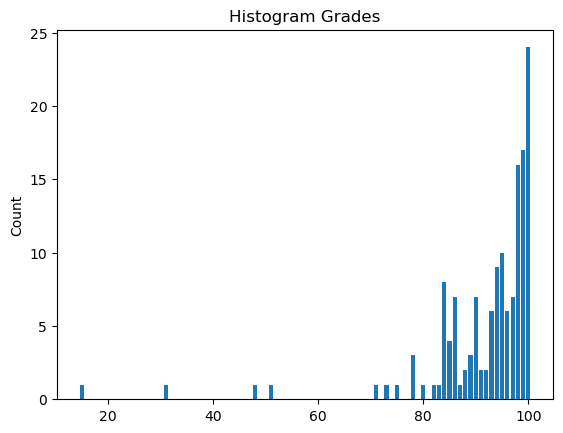

In [92]:
# Let's check grades distribution

plt.title('Histogram Grades')
plt.hist(scores["grade"], rwidth=.8, bins=np.arange(min(scores["grade"]), max(scores["grade"])+2) - 0.5)
plt.ylabel('Count')
plt.show()

In [93]:
df.reset_index(inplace=True, drop=False)
df.rename(columns={"index": "code"}, inplace=True)
df.head()

code  #error  #no  #thank  #next  #entropy  \
0  0031c86e-81f4-4eef-9e0e-28037abf9883     3.0  0.0     0.0    0.0       0.0   
1  0225686d-b825-4cac-8691-3a3a5343df2b     0.0  0.0     0.0    0.0       0.0   
2  041f950b-c013-409a-a642-cffff60b9d4b     1.0  0.0     0.0    0.0       0.0   
3  04f91058-d0f8-4324-83b2-19c671f433dc     1.0  0.0     0.0    0.0       0.0   
4  089eb66d-4c3a-4f58-b98f-a3774a2efb34     1.0  0.0     0.0    0.0       0.0   

   #user_prompts  prompt_avg_chars  response_avg_chars  prompt_avg_words  \
0           14.0        265.785714         1523.142857         39.785714   
1           18.0        175.166667         1179.944444         26.444444   
2            9.0        453.111111         1201.000000         67.777778   
3           20.0         84.650000         1220.800000         13.150000   
4           86.0        155.174419         1030.093023         20.406977   

   response_avg_words  prompt_unique_words  response_unique_words  \
0          206.285714                234.0                  616.0   
1          153.166667                247.0                  719.0   
2          154.333333                291.0                  452.0   
3          166.900000                147.0                  707.0   
4          134.232558                647.0                 1366.0   

   total_positive_words  total_negative_words  longest_word_length  \
0                   9.0                  13.0                 22.0   
1                   9.0                   6.0                 20.0   
2                   9.0                  13.0                 33.0   
3                   5.0                   9.0                 23.0   
4                  29.0                  31.0                 87.0   

   total_words  
0       3445.0  
1       3233.0  
2       1999.0  
3       3601.0  
4      13299.0

In [94]:
df = pd.merge(df, question_mapping_scores, on="code", how="left")
df.head()

code  #error  #no  #thank  #next  #entropy  \
0  0031c86e-81f4-4eef-9e0e-28037abf9883     3.0  0.0     0.0    0.0       0.0   
1  0225686d-b825-4cac-8691-3a3a5343df2b     0.0  0.0     0.0    0.0       0.0   
2  041f950b-c013-409a-a642-cffff60b9d4b     1.0  0.0     0.0    0.0       0.0   
3  04f91058-d0f8-4324-83b2-19c671f433dc     1.0  0.0     0.0    0.0       0.0   
4  089eb66d-4c3a-4f58-b98f-a3774a2efb34     1.0  0.0     0.0    0.0       0.0   

   #user_prompts  prompt_avg_chars  response_avg_chars  prompt_avg_words  \
0           14.0        265.785714         1523.142857         39.785714   
1           18.0        175.166667         1179.944444         26.444444   
2            9.0        453.111111         1201.000000         67.777778   
3           20.0         84.650000         1220.800000         13.150000   
4           86.0        155.174419         1030.093023         20.406977   

   response_avg_words  prompt_unique_words  response_unique_words  \
0          206.285714                234.0                  616.0   
1          153.166667                247.0                  719.0   
2          154.333333                291.0                  452.0   
3          166.900000                147.0                  707.0   
4          134.232558                647.0                 1366.0   

   total_positive_words  total_negative_words  longest_word_length  \
0                   9.0                  13.0                 22.0   
1                   9.0                   6.0                 20.0   
2                   9.0                  13.0                 33.0   
3                   5.0                   9.0                 23.0   
4                  29.0                  31.0                 87.0   

   total_words       Q_0       Q_1       Q_2       Q_3       Q_4       Q_5  \
0       3445.0  0.247160  0.454416  0.597386  0.510641  0.297158  0.374000   
1       3233.0  0.209585  0.659639  0.739568  0.637079  0.267884  0.559101   
2       1999.0  0.159156  0.146382  0.476740  0.282473  0.262501  0.179868   
3       3601.0  0.097802  0.269722  0.366491  0.488918  0.245376  0.375104   
4      13299.0  0.431564  0.551965  0.727811  0.559391  0.276744  0.439470   

        Q_6       Q_7  
0  0.077103  0.244404  
1  0.596132  0.552411  
2  0.340461  0.489587  
3  0.170774  0.389027  
4  0.387740  0.685935

#### Merging scores with features

In [95]:
temp_df = pd.merge(df, scores, on='code', how="left")
temp_df.dropna(inplace=True)
temp_df.drop_duplicates("code",inplace=True, keep="first")
temp_df.head()

code  #error  #no  #thank  #next  #entropy  \
0  0031c86e-81f4-4eef-9e0e-28037abf9883     3.0  0.0     0.0    0.0       0.0   
1  0225686d-b825-4cac-8691-3a3a5343df2b     0.0  0.0     0.0    0.0       0.0   
2  041f950b-c013-409a-a642-cffff60b9d4b     1.0  0.0     0.0    0.0       0.0   
3  04f91058-d0f8-4324-83b2-19c671f433dc     1.0  0.0     0.0    0.0       0.0   
4  089eb66d-4c3a-4f58-b98f-a3774a2efb34     1.0  0.0     0.0    0.0       0.0   

   #user_prompts  prompt_avg_chars  response_avg_chars  prompt_avg_words  \
0           14.0        265.785714         1523.142857         39.785714   
1           18.0        175.166667         1179.944444         26.444444   
2            9.0        453.111111         1201.000000         67.777778   
3           20.0         84.650000         1220.800000         13.150000   
4           86.0        155.174419         1030.093023         20.406977   

   response_avg_words  prompt_unique_words  response_unique_words  \
0          206.285714                234.0                  616.0   
1          153.166667                247.0                  719.0   
2          154.333333                291.0                  452.0   
3          166.900000                147.0                  707.0   
4          134.232558                647.0                 1366.0   

   total_positive_words  total_negative_words  longest_word_length  \
0                   9.0                  13.0                 22.0   
1                   9.0                   6.0                 20.0   
2                   9.0                  13.0                 33.0   
3                   5.0                   9.0                 23.0   
4                  29.0                  31.0                 87.0   

   total_words       Q_0       Q_1       Q_2       Q_3       Q_4       Q_5  \
0       3445.0  0.247160  0.454416  0.597386  0.510641  0.297158  0.374000   
1       3233.0  0.209585  0.659639  0.739568  0.637079  0.267884  0.559101   
2       1999.0  0.159156  0.146382  0.476740  0.282473  0.262501  0.179868   
3       3601.0  0.097802  0.269722  0.366491  0.488918  0.245376  0.375104   
4      13299.0  0.431564  0.551965  0.727811  0.559391  0.276744  0.439470   

        Q_6       Q_7  grade  
0  0.077103  0.244404   48.0  
1  0.596132  0.552411   99.0  
2  0.340461  0.489587   90.0  
3  0.170774  0.389027   97.0  
4  0.387740  0.685935  100.0

In [96]:
# #merging our score calculations with the table 
# #bizim bulduğumuz sonuçları tablo ile birleştiriyoruz
temp_df = pd.merge(temp_df, df_score_calculation, on='code', how="left")
# temp_df = temp_df.loc[temp_df['score_calculation'] != 0]
temp_df.dropna(inplace=True)
temp_df.drop_duplicates("code",inplace=True, keep="first")
temp_df

code  #error  #no  #thank  #next  \
0    0031c86e-81f4-4eef-9e0e-28037abf9883     3.0  0.0     0.0    0.0   
1    0225686d-b825-4cac-8691-3a3a5343df2b     0.0  0.0     0.0    0.0   
2    041f950b-c013-409a-a642-cffff60b9d4b     1.0  0.0     0.0    0.0   
3    04f91058-d0f8-4324-83b2-19c671f433dc     1.0  0.0     0.0    0.0   
4    089eb66d-4c3a-4f58-b98f-a3774a2efb34     1.0  0.0     0.0    0.0   
..                                    ...     ...  ...     ...    ...   
117  f24219d6-07f0-4baf-80ac-18475dc5b66f     1.0  0.0     0.0    0.0   
118  f2f18684-4a16-4c05-a2d1-c0f96d1de869     1.0  0.0     0.0    1.0   
119  f852596d-fdca-45aa-9050-d4f76ce6a53c     6.0  0.0     0.0    4.0   
120  f8ec3336-fd48-4654-ad98-62ccfb96d096     0.0  0.0     0.0    1.0   
121  fb8de815-224c-4d06-9fd4-7156d1a9920d     8.0  0.0     0.0    0.0   

     #entropy  #user_prompts  prompt_avg_chars  response_avg_chars  \
0         0.0           14.0        265.785714         1523.142857   
1         0.0           18.0        175.166667         1179.944444   
2         0.0            9.0        453.111111         1201.000000   
3         0.0           20.0         84.650000         1220.800000   
4         0.0           86.0        155.174419         1030.093023   
..        ...            ...               ...                 ...   
117       0.0           21.0        139.142857         1306.333333   
118       0.0           71.0        241.042254         1210.591549   
119       0.0           30.0        542.000000         1041.166667   
120       0.0           14.0        370.000000         1565.857143   
121       0.0           31.0        259.870968         1122.258065   

     prompt_avg_words  response_avg_words  prompt_unique_words  \
0           39.785714          206.285714                234.0   
1           26.444444          153.166667                247.0   
2           67.777778          154.333333                291.0   
3           13.150000          166.900000                147.0   
4           20.406977          134.232558                647.0   
..                ...                 ...                  ...   
117         21.285714          182.761905                223.0   
118         34.971831          164.605634                845.0   
119         69.666667          139.900000                558.0   
120         53.571429          206.142857                345.0   
121         38.161290          143.290323                483.0   

     response_unique_words  total_positive_words  total_negative_words  \
0                    616.0                   9.0                  13.0   
1                    719.0                   9.0                   6.0   
2                    452.0                   9.0                  13.0   
3                    707.0                   5.0                   9.0   
4                   1366.0                  29.0                  31.0   
..                     ...                   ...                   ...   
117                  689.0                  10.0                  11.0   
118                 1791.0                  24.0                  48.0   
119                  779.0                  24.0                  41.0   
120                  910.0                  10.0                  21.0   
121                  814.0                  22.0                  28.0   

     longest_word_length  total_words       Q_0       Q_1       Q_2       Q_3  \
0                   22.0       3445.0  0.247160  0.454416  0.597386  0.510641   
1                   20.0       3233.0  0.209585  0.659639  0.739568  0.637079   
2                   33.0       1999.0  0.159156  0.146382  0.476740  0.282473   
3                   23.0       3601.0  0.097802  0.269722  0.366491  0.488918   
4                   87.0      13299.0  0.431564  0.551965  0.727811  0.559391   
..                   ...          ...       ...       ...       ...       ...   
117                 21.0       4285.0  0.194212  0.269722  0.407031  0

In [97]:
X = temp_df[temp_df.columns[1:-1]].to_numpy()
y = temp_df["grade"].to_numpy()
print(X.shape, y.shape)

(122, 25) (122,)


#### Train/Test split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print("Train set size:", len(X_train))
# print("Test set size:", len(X_test))

#### Fitting a model

#### Predicting and Analyzing 

In [100]:
regressor = DecisionTreeRegressor(random_state=0,criterion='squared_error', max_depth=10)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [101]:
extracted_MSEs = regressor.tree_.impurity   
for idx, MSE in enumerate(regressor.tree_.impurity):
    print("Node {} has MSE {}".format(idx,MSE))

Node 0 has MSE 163.42034222552866
Node 1 has MSE 216.8888888888887
Node 2 has MSE 0.0
Node 3 has MSE 64.0
Node 4 has MSE 0.0
Node 5 has MSE 0.0
Node 6 has MSE 45.800362154819595
Node 7 has MSE 26.246913580247565
Node 8 has MSE 10.639999999999418
Node 9 has MSE 1.0
Node 10 has MSE 0.0
Node 11 has MSE 0.0
Node 12 has MSE 2.66666666666697
Node 13 has MSE 0.0
Node 14 has MSE 1.0
Node 15 has MSE 0.0
Node 16 has MSE 0.0
Node 17 has MSE 6.977272727272975
Node 18 has MSE 1.3254437869809408
Node 19 has MSE 0.5306122448982933
Node 20 has MSE 0.25
Node 21 has MSE 0.0
Node 22 has MSE 0.0
Node 23 has MSE 0.0
Node 24 has MSE 0.25
Node 25 has MSE 0.0
Node 26 has MSE 0.0
Node 27 has MSE 0.46913580246928177
Node 28 has MSE 0.1875
Node 29 has MSE 0.0
Node 30 has MSE 0.0
Node 31 has MSE 0.0
Node 32 has MSE 6.770773000667759
Node 33 has MSE 1.9199999999982538
Node 34 has MSE 0.8402366863901989
Node 35 has MSE 0.22222222222080745
Node 36 has MSE 0.0
Node 37 has MSE 0.0
Node 38 has MSE 0.25
Node 39 has MSE 

In [102]:
# Plotting the Tree 
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=temp_df.columns[1:-1])
graph = graphviz.Source(dot_data)
graph.render("hw")


'hw.pdf'

In [103]:
# Prediction
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Calculation of Mean Squared Error (MSE)
print("MSE Train:", mean_squared_error(y_train,y_train_pred))
print("MSE TEST:", mean_squared_error(y_test,y_test_pred))

print("R2 Train:", r2_score(y_train,y_train_pred))
print("R2 TEST:", r2_score(y_test,y_test_pred))


MSE Train: 0.0
MSE TEST: 2.6
R2 Train: 1.0
R2 TEST: 0.9768406350654163


In [104]:
y_test_pred 

array([ 96.,  91.,  97.,  89., 100.,  97., 100.,  95.,  94.,  90.,  85.,
        98.,  94.,  71.,  98., 100.,  85.,  97.,  90.,  51.,  85., 100.,
        99., 100.,  94.])

In [105]:
y_test

array([ 96.,  91.,  97.,  88., 100.,  97., 100.,  95.,  94.,  90.,  86.,
        98.,  94.,  78.,  98., 100.,  86.,  97.,  90.,  48.,  87., 100.,
        99., 100.,  94.])